In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
df = pd.read_csv("dataset.csv")
df.head(10)

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.00,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.00,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.00,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.00,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.00,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52
5,Algeria,Northern Africa,DZA,2005,32956690,3131.33,11478.03,2381741,24.16,91.78,94.19,0.00,8.21,-2.41,5.66,11.05,88.53,32.60,2.35,12.50
6,Algeria,Northern Africa,DZA,2006,33435080,3500.13,11861.17,2381741,25.63,97.40,99.81,0.00,8.70,-2.41,6.54,12.51,93.27,34.24,2.23,12.19
7,Algeria,Northern Africa,DZA,2007,33983827,3971.80,12392.51,2381741,27.60,100.34,102.75,0.00,9.72,-2.41,7.00,10.87,95.75,33.96,2.23,13.60
8,Algeria,Northern Africa,DZA,2008,34569592,4946.56,12714.16,2381741,29.19,105.34,107.75,0.00,10.08,-2.41,7.58,12.03,100.16,35.28,2.28,13.57
9,Algeria,Northern Africa,DZA,2009,35196037,3898.48,12768.99,2381741,30.52,109.77,112.17,3.93,9.85,-2.41,8.22,9.51,103.95,36.67,2.36,13.48


In [3]:
df.info()
print("\nMissing Values:\n", df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1134 non-null   object 
 1   Sub-Region                              1134 non-null   object 
 2   Code                                    1134 non-null   object 
 3   Year                                    1134 non-null   int64  
 4   Population                              1134 non-null   int64  
 5   GDP PER CAPITA (USD)                    1107 non-null   float64
 6   GDP PER CAPITA PPP (USD)                1086 non-null   float64
 7   Area (Km2)                              1134 non-null   int64  
 8   Transportation (Mt)                     1122 non-null   float64
 9   Total CO2 Emission including LUCF (Mt)  1134 non-null   float64
 10  Total CO2 Emission excluding LUCF (Mt)  1134 non-null   floa

,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
count,1134.000000,1.134000e+03,1107.000000,1086.000000,1.134000e+03,1122.000000,1134.000000,1134.000000,1122.000000,1122.000000,1134.000000,1072.000000,330.000000,1134.000000,1122.000000,1122.000000,1122.000000
mean,2010.000000,1.975236e+07,2220.015953,5106.329926,5.564746e+05,4.913164,41.243289,20.818968,0.434394,2.548387,20.424577,1.114981,4.567152,19.765159,9.272451,0.753788,1.454635
std,6.057972,2.877802e+07,2971.760298,5989.405811,5.983822e+05,10.844025,89.057762,62.186060,1.190362,7.805355,66.859781,2.919895,7.963444,60.348813,38.468534,1.895787,4.303603
min,2000.000000,8.113100e+04,110.460000,420.270000,4.520000e+02,0.010000,-10.410000,0.050000,0.000000,0.000000,-24.950000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000
25%,2005.000000,2.384106e+06,526.280000,1468.582500,5.678500e+04,0.360000,2.772500,0.810000,0.000000,0.060000,0.105000,0.000000,0.322500,0.782500,0.090000,0.050000,0.040000
50%,2010.000000,1.078683e+07,1009.490000,2544.630000,3.322315e+05,1.065000,14.110000,2.715000,0.030000,0.320000,6.420000,0.080000,1.800000,2.560000,0.305000,0.150000,0.120000
75%,2015.000000,2.359457e+07,2538.470000,6072.067500,9.237680e+05,2.937500,39.772500,7.777500,0.190000,1.460000,17.350000,0.632500,4.762500,7.207500,2.145000,0.640000,0.530000
max,2020.000000,2.083274e+08,19849.720000,33261.870000,2.381741e+06,59.450000,606.390000,448.300000,8.680000,61.100000,601.260000,22.820000,52.490000,443.390000,311.550000,14.790000,33.970000


In [4]:
df = df.dropna(thresh=len(df) * 0.5, axis=1)
df.fillna(df.median(numeric_only=True), inplace=True)
df_cleaned = df.copy()

In [5]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_scaled.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,0.00,0.147390,0.084599,0.246337,1.0,0.283311,0.147584,0.178472,0.0,0.100818,0.040753,0.166082,0.171900,0.093629,0.132522,0.274654
1,Algeria,Northern Africa,DZA,0.05,0.149438,0.083292,0.256394,1.0,0.286507,0.140483,0.175349,0.0,0.102291,0.035994,0.165206,0.168787,0.096935,0.133874,0.280542
2,Algeria,Northern Africa,DZA,0.10,0.151472,0.085330,0.272032,1.0,0.325538,0.146579,0.183714,0.0,0.108347,0.035994,0.177914,0.176614,0.103611,0.146721,0.291139
3,Algeria,Northern Africa,DZA,0.15,0.153543,0.101655,0.294377,1.0,0.365915,0.155950,0.196631,0.0,0.114730,0.035994,0.176599,0.189719,0.104413,0.127789,0.314395
4,Algeria,Northern Africa,DZA,0.20,0.155725,0.127378,0.311589,1.0,0.370458,0.158074,0.199532,0.0,0.132406,0.035994,0.214724,0.190711,0.101910,0.148073,0.339123


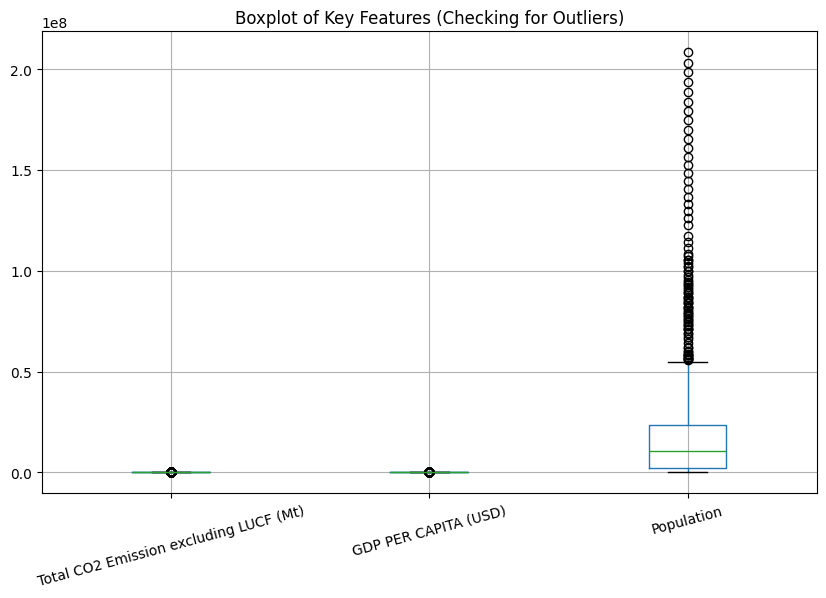

In [6]:
features_to_check = ["Total CO2 Emission excluding LUCF (Mt)", "GDP PER CAPITA (USD)", "Population"]

plt.figure(figsize=(10, 6))
df[features_to_check].boxplot()
plt.title("Boxplot of Key Features (Checking for Outliers)")
plt.xticks(rotation=15)
plt.show()

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_scaled.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,0.00,0.147390,0.084599,0.246337,1.0,0.283311,0.147584,0.178472,0.0,0.100818,0.040753,0.166082,0.171900,0.093629,0.132522,0.274654
1,Algeria,Northern Africa,DZA,0.05,0.149438,0.083292,0.256394,1.0,0.286507,0.140483,0.175349,0.0,0.102291,0.035994,0.165206,0.168787,0.096935,0.133874,0.280542
2,Algeria,Northern Africa,DZA,0.10,0.151472,0.085330,0.272032,1.0,0.325538,0.146579,0.183714,0.0,0.108347,0.035994,0.177914,0.176614,0.103611,0.146721,0.291139
3,Algeria,Northern Africa,DZA,0.15,0.153543,0.101655,0.294377,1.0,0.365915,0.155950,0.196631,0.0,0.114730,0.035994,0.176599,0.189719,0.104413,0.127789,0.314395
4,Algeria,Northern Africa,DZA,0.20,0.155725,0.127378,0.311589,1.0,0.370458,0.158074,0.199532,0.0,0.132406,0.035994,0.214724,0.190711,0.101910,0.148073,0.339123


In [8]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_filtered

df_cleaned = remove_outliers(df_scaled, features_to_check)
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_cleaned.shape[0]}")

Original dataset size: 1134
Dataset size after removing outliers: 829


In [9]:
print(df_cleaned)

       Country      Sub-Region Code  Year  Population  GDP PER CAPITA (USD)  \
21      Angola   Middle Africa  AGO  0.00    0.078335              0.022616   
22      Angola   Middle Africa  AGO  0.05    0.080964              0.021125   
23      Angola   Middle Africa  AGO  0.10    0.083723              0.038613   
24      Angola   Middle Africa  AGO  0.15    0.086644              0.044194   
25      Angola   Middle Africa  AGO  0.20    0.089749              0.057968   
...        ...             ...  ...   ...         ...                   ...   
1129  Zimbabwe  Eastern Africa  ZWE  0.80    0.069012              0.066433   
1130  Zimbabwe  Eastern Africa  ZWE  0.85    0.070445              0.054797   
1131  Zimbabwe  Eastern Africa  ZWE  0.90    0.071891              0.109362   
1132  Zimbabwe  Eastern Africa  ZWE  0.95    0.073343              0.066437   
1133  Zimbabwe  Eastern Africa  ZWE  1.00    0.074856              0.063946   

      GDP PER CAPITA PPP (USD)  Area (Km2)  Transpo

In [10]:
# df_cleaned.to_excel("cleaned_emissions.xlsx", index=False, engine='openpyxl')
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

conn = sqlite3.connect("cleaned_emissions.db")
df_cleaned.to_sql("cleaned_emissions", con=conn, if_exists="replace", index=False)
conn.close()
print("DataFrame successfully written to SQLite database!")

DataFrame successfully written to SQLite database!


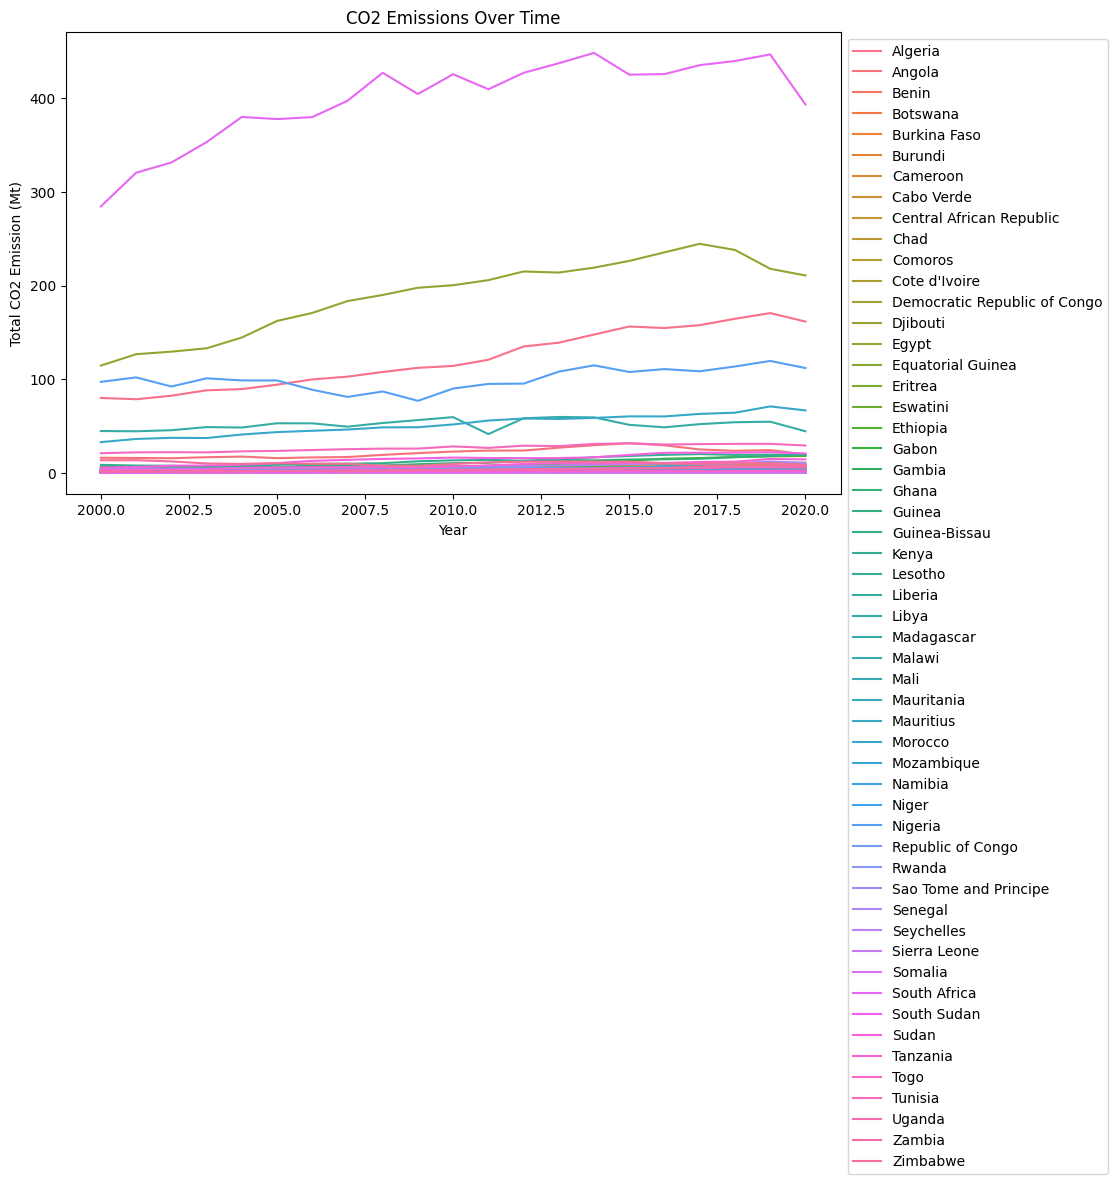

In [11]:
df['Year'] = pd.to_numeric(df['Year'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Total CO2 Emission excluding LUCF (Mt)', hue='Country')
plt.title('CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
countries = ["Lesotho", "Madagascar"]
df_selected = df[df["Country"].isin(countries)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_selected, x="Year", y="Total CO2 Emission excluding LUCF (Mt)", hue="Country", marker="o")
plt.title("CO2 Emissions Trend for Lesotho & Madagascar")
plt.xlabel("Year")
plt.ylabel("Total CO2 Emission (Mt)")
plt.legend(title="Country")
plt.grid(True)
plt.show()

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of CO2 Emissions Data')
plt.show()

In [ ]:
features = ["Population", "GDP PER CAPITA (USD)", "Energy (Mt)"]
target = "Total CO2 Emission excluding LUCF (Mt)"

X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot(y_test, y_test, color='purple', linestyle='dashed', linewidth=2)
plt.xlabel("Actual CO₂ Emission")
plt.ylabel("Predicted CO₂ Emission")
plt.title("Actual vs. Predicted CO₂ Emission")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=20, kde=True, color="blue")
plt.axvline(0, color="purple", linestyle="dashed", linewidth=2)
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

In [ ]:
model_filename = "co2_emission_model.pkl"
joblib.dump(regressor, model_filename)
print(f"Model saved as {model_filename}")

loaded_model = joblib.load(model_filename)
new_predictions = loaded_model.predict(X_test)
print("Predictions from loaded model:", new_predictions[:5])

In [ ]:
selected_countries = ['Kenya', 'Lesotho', 'South Africa', 'Egypt', 'Nigeria']
year_filter = 2020

df_selected = df[(df['Year'] == year_filter) & (df['Country'].isin(selected_countries))]
df_selected_sorted = df_selected.sort_values(by='Total CO2 Emission excluding LUCF (Mt)', ascending=False)

plt.figure(figsize=(11, 10))
plt.pie(df_selected_sorted['Total CO2 Emission excluding LUCF (Mt)'],
        labels=df_selected_sorted['Country'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("Set2", len(df_selected_sorted)))
plt.title(f"CO₂ Emission Share in {year_filter} (Selected African Countries)")
plt.axis('equal')
plt.show()

In [ ]:
selected_countries = ['Kenya', 'South Sudan', 'Lesotho', 'Egypt', 'South Africa']
year_filter = 2020

df_selected = df[(df['Year'] == year_filter) & (df['Country'].isin(selected_countries))]
df_selected_sorted = df_selected.sort_values(by='Total CO2 Emission excluding LUCF (Mt)', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_selected_sorted,
            x='Country',
            y='Total CO2 Emission excluding LUCF (Mt)',
            hue='Country',
            palette='rocket',
            dodge=False)
plt.title(f'Total CO₂ Emissions in {year_filter} for Selected African Countries')
plt.xlabel('Country')
plt.ylabel('Total CO₂ Emission (Mt)')
plt.tight_layout()
plt.show()